### Question 1 (5 marks)
**Import the dataset** and display the first 5 rows to understand the structure and columns.

In [32]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("ecommerce_customer_data.csv")
df.head(5)

,Customer_ID,Age,Gender,Country,Marital_Status,Language_Preference,Signup_Source,Signup_Date,Last_Login,Total_Logins,...,Category_Tag_2,Category_Tag_3,Category_Tag_4,Category_Tag_5,Category_Tag_6,Category_Tag_7,Category_Tag_8,Category_Tag_9,Category_Tag_10,Total_Spend
0,CUST_100000,56,Male,Australia,Married,DE,Email,2019-04-06,2024-01-19,79,...,Tag_4,Tag_1,Tag_5,Tag_2,Tag_3,Tag_2,Tag_5,Tag_2,Tag_1,735.68
1,CUST_100001,69,Female,India,Single,ES,Ad Campaign,2022-11-14,2025-03-13,71,...,Tag_1,Tag_1,Tag_3,Tag_3,Tag_3,Tag_4,Tag_1,Tag_1,Tag_1,587.46
2,CUST_100002,46,Prefer Not to Say,USA,Divorced,DE,Email,2019-04-19,2024-05-24,67,...,Tag_4,Tag_2,Tag_1,Tag_4,Tag_1,Tag_6,Tag_4,Tag_2,Tag_1,892.71
3,CUST_100003,32,Male,Australia,Married,ZH,Email,2019-11-16,2024-03-05,80,...,Tag_5,Tag_2,Tag_6,Tag_2,Tag_3,Tag_2,Tag_1,Tag_3,Tag_5,420.90
4,CUST_100004,60,Male,USA,Widowed,ZH,Organic Search,2020-11-26,2023-12-06,75,...,Tag_2,NaN,Tag_2,NaN,Tag_1,Tag_4,Tag_2,Tag_4,Tag_4,419.52


### Question 2 (5 marks)
**Generate a summary** of the dataset using `.info()` and `.describe()`. Also report the total number of missing values per column.

In [33]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  5000 non-null   object 
 1   Age                          5000 non-null   int64  
 2   Gender                       5000 non-null   object 
 3   Country                      5000 non-null   object 
 4   Marital_Status               5000 non-null   object 
 5   Language_Preference          5000 non-null   object 
 6   Signup_Source                5000 non-null   object 
 7   Signup_Date                  5000 non-null   object 
 8   Last_Login                   5000 non-null   object 
 9   Total_Logins                 5000 non-null   int64  
 10  Time_Spent_Minutes           4700 non-null   float64
 11  Device_Type                  5000 non-null   object 
 12  Preferred_Browser            5000 non-null   object 
 13  Is_Active         

In [34]:
# Show missing values with data types, sorted by data type then missing count
missing_info = df.isnull().sum()[df.isnull().sum() > 0].to_frame('Missing_Count')
missing_info['Data_Type'] = df.dtypes[missing_info.index]
missing_info = missing_info.sort_values(['Data_Type', 'Missing_Count'], ascending=[True, False])
print(missing_info)

                           Missing_Count Data_Type
Average_Order_Value                  350   float64
Total_Spend                          350   float64
Time_Spent_Minutes                   300   float64
Used_Discount_Code                  1571    object
Campaign_Engagement_Level           1560    object
Category_Tag_1                       300    object
Category_Tag_2                       300    object
Category_Tag_3                       300    object
Category_Tag_4                       300    object
Category_Tag_5                       300    object


### Question 3 (5 marks)
**Handle missing values**: Choose appropriate imputation strategies for numerical and categorical columns. Explain your method.

In [35]:
# Create a working copy of the original data BEFORE modifying it
df_missing_handled = df.copy()

# Get columns with missing values
missing_cols = df_missing_handled.columns[df.isnull().sum() > 0]

# Now perform imputation on the working copy
numcols = df_missing_handled.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])\
    .columns.intersection(missing_cols)\
    .difference(['Total_Spend'])\
    .tolist()

print("=== Imputing Numerical Columns ===")
for col in numcols:
    median_val = df_missing_handled[col].median()
    df_missing_handled[col].fillna(median_val, inplace=True)
    print(f"Filled missing values in '{col}' with median: {median_val}")

catcols = df_missing_handled.select_dtypes(include=['object'])\
                .columns.intersection(missing_cols)\
                .tolist()

print("\n=== Imputing Categorical Columns ===")
for col in catcols:
    mode_val = df_missing_handled[col].mode()[0]
    df_missing_handled[col].fillna(mode_val, inplace=True)
    print(f"Filled missing values in '{col}' with mode: {mode_val}")

df_missing_handled = df_missing_handled[df_missing_handled['Total_Spend'].notnull()]

print(df_missing_handled.head())

=== Imputing Numerical Columns ===
Filled missing values in 'Average_Order_Value' with median: 84.955
Filled missing values in 'Time_Spent_Minutes' with median: 207.24

=== Imputing Categorical Columns ===
Filled missing values in 'Used_Discount_Code' with mode: SAVE20
Filled missing values in 'Campaign_Engagement_Level' with mode: Low
Filled missing values in 'Category_Tag_1' with mode: Tag_1
Filled missing values in 'Category_Tag_2' with mode: Tag_2
Filled missing values in 'Category_Tag_3' with mode: Tag_1
Filled missing values in 'Category_Tag_4' with mode: Tag_1
Filled missing values in 'Category_Tag_5' with mode: Tag_1
   Customer_ID  Age             Gender    Country Marital_Status  \
0  CUST_100000   56               Male  Australia        Married   
1  CUST_100001   69             Female      India         Single   
2  CUST_100002   46  Prefer Not to Say        USA       Divorced   
3  CUST_100003   32               Male  Australia        Married   
4  CUST_100004   60        

/tmp/ipykernel_2193/3741766078.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_missing_handled[col].fillna(median_val, inplace=True)
/tmp/ipykernel_2193/3741766078.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Method Explanation

For the numercial imputation, median is used since it is unaffected by outliers. If the feature is not normally distributed, using mean may misrepresent the central tendency.

For the categorical imputation, fillna(mode) is used to give a consistent, data-driven default. It is more stable when data is shuffled and avoids misleading dependencies between unrelated rows. I have considered ffill() and bfill() but these rely on the order of rows, which may random unless the data is time-series or sorted.

### Question 4 (5 marks)
**Encode categorical variables** using suitable techniques (Label Encoding, One-Hot Encoding, etc.). Explain when and why you chose the method.

In [36]:
# Identify all categorical columns (object type)
all_catcols = df_missing_handled.select_dtypes(include=['object']).columns.tolist()

df_with_country = df_missing_handled.copy()
# Apply one-hot encoding to ALL categorical columns
df_encoded = pd.get_dummies(df_missing_handled, columns=all_catcols, drop_first=True)
#df_encoded = pd.get_dummies(df, columns=catcols, drop_first=True)

# Create the final cleaned DataFrame
df_clean = df_encoded.copy()

print(df_encoded.head())
print(df_clean.head())

print(f"Final cleaned data shape: {df_clean.shape}")
print(f"Sample columns: {df_clean.columns[:10].tolist()}")

   Age  Total_Logins  Time_Spent_Minutes  Is_Active  Total_Orders  \
0   56            79             1079.65      False             8   
1   69            71              304.19       True             6   
2   46            67               99.30      False             9   
3   32            80              279.87       True             6   
4   60            75              125.81       True             6   

   Average_Order_Value  Has_Premium_Membership  Abandoned_Carts  \
0                91.96                   False                4   
1                97.91                   False                3   
2                99.19                   False                3   
3                70.15                    True                3   
4                69.92                   False                0   

   Support_Tickets_Raised  Customer_Satisfaction_Score  ...  \
0                       1                          4.3  ...   
1                       1                          2.8  

Method Explanation:

Created binary column for each category. One-Hot Encoding is used since it is best for nominal features.

### Question 5 (5 marks)
**Detect and remove outliers** from key numerical features using IQR or Z-score. Show before/after comparisons.

In [37]:
# Step 1: Identify all numeric features for outlier detection, excluding the target
all_numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
key_num_cols = [col for col in all_numeric_cols if col != 'Total_Spend']

# Step 2: Show original row count
print(f"Original Row Count: {df_clean.shape[0]} rows\n")

# Step 3: Detect and remove outliers using IQR method
for col in key_num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

    # Remove outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Step 4: Show new row count
print(f"\nCleaned dataset after outlier removal: {df_clean.shape[0]} rows")

Original Row Count: 4650 rows

Age: 0 outliers detected
Total_Logins: 46 outliers detected
Time_Spent_Minutes: 233 outliers detected
Total_Orders: 7 outliers detected
Average_Order_Value: 28 outliers detected
Abandoned_Carts: 28 outliers detected
Support_Tickets_Raised: 317 outliers detected
Customer_Satisfaction_Score: 0 outliers detected
Feedback_Comment_Length: 0 outliers detected

Cleaned dataset after outlier removal: 3991 rows


### Question 6 (5 marks)
**Group the dataset** by `Country` and compute the average total spend and number of orders per country. Present it using a sorted table.

In [38]:
country_summary = df_with_country.groupby('Country').agg(
    Average_Total_Spend=('Total_Spend', 'mean'),
    Number_of_Orders=('Total_Spend', 'count')  # Or count any column
).reset_index()

# Sort by average spend descending
country_summary = country_summary.sort_values(by='Average_Total_Spend', ascending=False)

# Display the result
print(country_summary)

     Country  Average_Total_Spend  Number_of_Orders
2    Germany           516.775165               757
5        USA           516.568496               811
4         UK           514.899063               758
3      India           509.495209               812
1     Canada           508.458601               772
0  Australia           507.186500               740


### Question 7 (5 marks)
**Create at least 2 new features** derived from existing columns (e.g., `Spend_per_Login`, `Days_Since_Last_Login`). Justify their potential usefulness.

In [39]:
#Derived Feature 1: Age Group Features
# Justification: Enables businesses to better understand, target, and engage different customer segments based on their unique preferences, behaviors, and needs
age_bins = [0, 18, 25, 35, 50, 65, 100]  # bins for age ranges
age_labels = ['Under 18', '18-24', '25-34', '35-49', '50-64', '65+']  # labels for groups

# Create a new column 'Age_Group' by binning 'Age' using pd.cut
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=age_bins, labels=age_labels, right=False)

# Check the result
print(df_clean[['Age', 'Age_Group']])

#Derived Feature 2: Average Session Duration - Time_Spent_Minutes divided by Total_Logins
# Justification: It measures the average amount of time a customer spends per login session, giving insight into how engaged users are during each visit (level of engagement per login).
# To avoid division by zero, replace 0 in 'Total_Logins' with NaN
df_clean['Total_Logins'].replace(0, pd.NA, inplace=True)

# Calculate Average Session Duration
df_clean['Average_Session_Duration'] = df_clean['Time_Spent_Minutes'] / df_clean['Total_Logins']

# Optionally, fill NaN values with 0 or another value if needed
df_clean['Average_Session_Duration'].fillna(0, inplace=True)

# Check the result
print(df_clean[['Time_Spent_Minutes', 'Total_Logins', 'Average_Session_Duration']])

      Age Age_Group
1      69       65+
2      46     35-49
3      32     25-34
4      60     50-64
5      25     25-34
...   ...       ...
4995   24     18-24
4996   66       65+
4997   26     25-34
4998   53     50-64
4999   36     35-49

[3991 rows x 2 columns]
      Time_Spent_Minutes  Total_Logins  Average_Session_Duration
1                 304.19            71                  4.284366
2                  99.30            67                  1.482090
3                 279.87            80                  3.498375
4                 125.81            75                  1.677467
5                 207.24            77                  2.691429
...                  ...           ...                       ...
4995              160.41            73                  2.197397
4996              545.96            80                  6.824500
4997              113.65            77                  1.475974
4998              197.49            87                  2.270000
4999              20

/tmp/ipykernel_2193/100631126.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Total_Logins'].replace(0, pd.NA, inplace=True)
/tmp/ipykernel_2193/100631126.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

### Question 8 (5 marks)
**Visualize the correlation matrix** for numerical columns using a heatmap. Identify at least two pairs of highly correlated variables and explain their relationship.

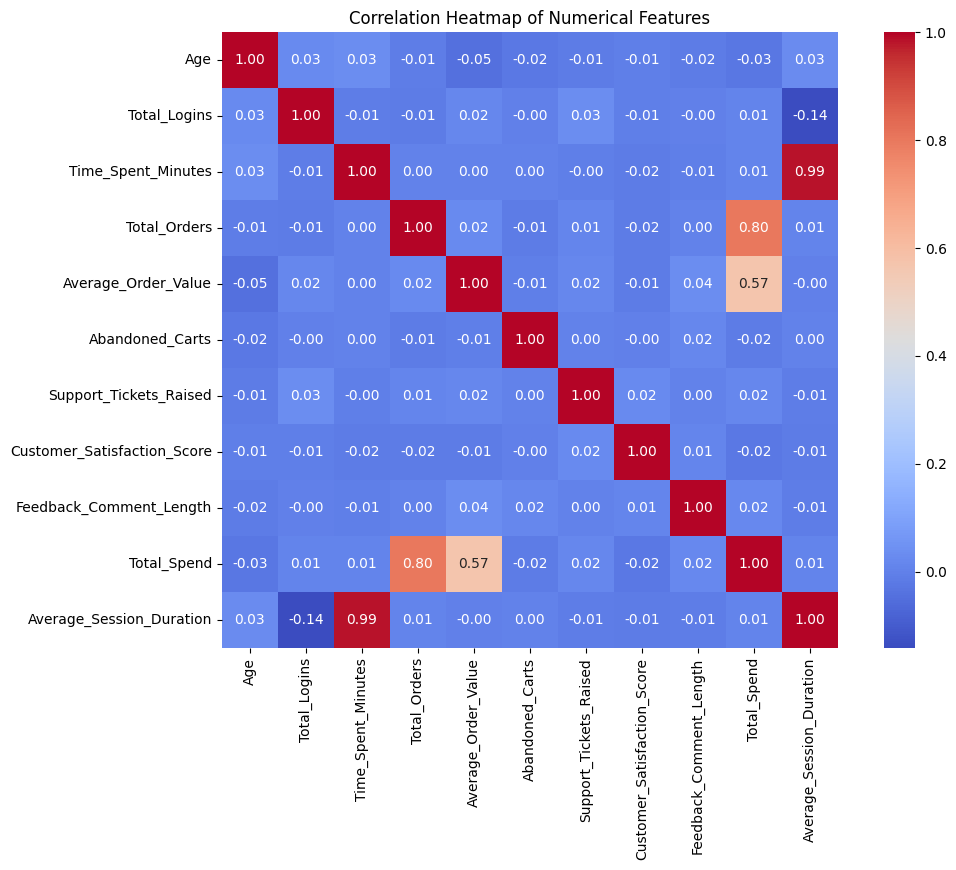

In [40]:
# Select numerical features only (excluding IDs if applicable)
numcols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Compute correlation matrix
corr_matrix = df_clean[numcols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Correlated Variables

1. Time_Spent_Minutes and Average_Session_Duration (correlation ≈ 0.99):
These two variables are almost perfectly correlated because Average_Session_Duration is directly calculated from Time_Spent_Minutes divided by Total_Logins. As the total time spent increases (assuming logins are relatively stable), the average session duration will also increase.

2. Total_Orders and Total_Spend (correlation ≈ 0.80):
There is a strong positive correlation between Total_Orders and Total_Spend, which makes sense because customers who place more orders generally spend more money overall.

3. Average_Order_Value and Total_Spend (correlation ≈ 0.57):
These variables are moderately correlated, indicating that customers with a higher average order value tend to have higher total spend, though the relationship is not as strong as with the number of orders.

### Question 9 (5 marks)
**Plot the distribution** of key numerical features (e.g., `Total_Spend`, `Average_Order_Value`, `Age`). Identify skewness or anomalies.

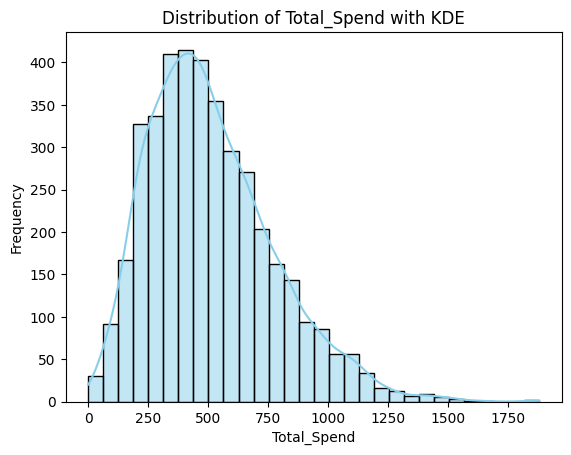

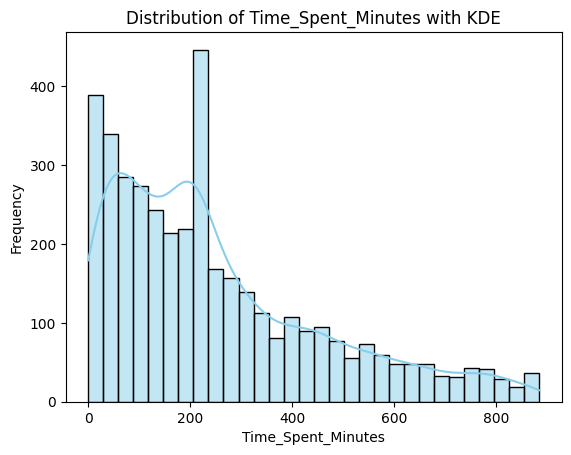

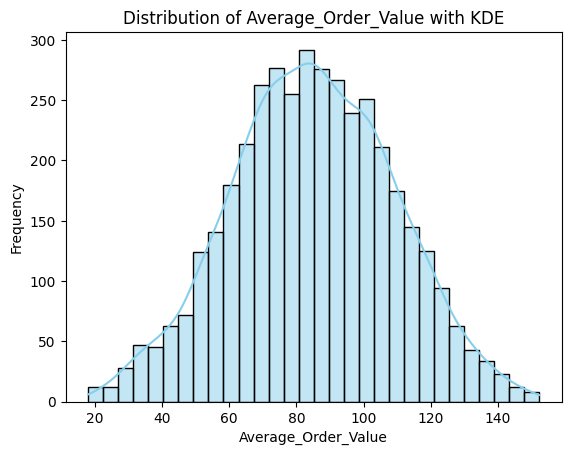

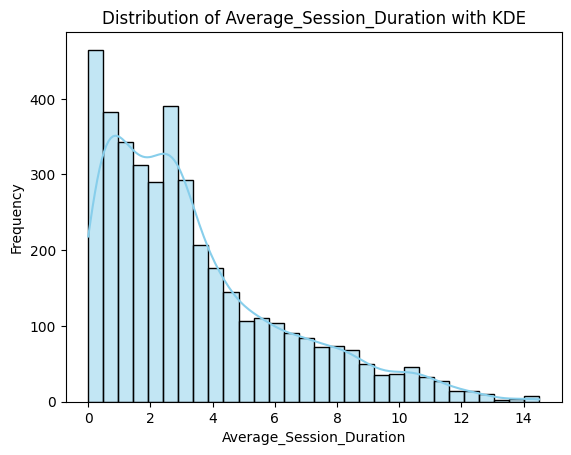

In [60]:
numerical_cols = ['Total_Spend', 'Time_Spent_Minutes', 'Average_Order_Value', 'Average_Session_Duration']

for col in numerical_cols:
    sns.histplot(data=df_clean, x=col, bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col} with KDE')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

df_clean.to_csv('ecommerce_cleanedv1.csv', index=False)

### Question 10 (5 marks)
**Prepare a clustering-ready version** of the dataset by normalizing/standardizing the features and briefly describe what clustering task could be done.

In [ ]:
# One-hot encode the 'Age_Group' categorical column
df_age_encoded = pd.get_dummies(df_clean['Age_Group'], prefix='Age_Group', dtype=int)

# Now df_age_encoded contains binary columns like 'Age_Group_18-24', 'Age_Group_25-34', etc.
print(df_age_encoded.head())

age_group_encoded_cols = df_age_encoded.columns.tolist()

# Combine numerical features with encoded age group columns for clustering
features_for_clustering = df_clean[[
    'Average_Order_Value', 
    'Time_Spent_Minutes', 
    'Average_Session_Duration'
]].join(df_age_encoded[age_group_encoded_cols])

# Standardize only the numerical features, NOT the one-hot encoded categorical columns
numerical_features = ['Average_Order_Value', 'Time_Spent_Minutes', 'Average_Session_Duration']

scaler = StandardScaler()
features_for_clustering[numerical_features] = scaler.fit_transform(features_for_clustering[numerical_features])

# Now features_for_clustering contains scaled numerical features and unscaled one-hot encoded age groups
df_cluster_ready = features_for_clustering.copy()

# Check the prepared features
print(df_cluster_ready.head())


   Age_Group_Under 18  Age_Group_18-24  Age_Group_25-34  Age_Group_35-49  \
1                   0                0                0                0   
2                   0                0                0                1   
3                   0                0                1                0   
4                   0                0                0                0   
5                   0                0                1                0   

   Age_Group_50-64  Age_Group_65+  
1                0              1  
2                0              0  
3                0              0  
4                1              0  
5                0              0  
   Average_Order_Value  Time_Spent_Minutes  Average_Session_Duration  \
1             0.540949            0.253033                  0.302813   
2             0.593915           -0.725525                 -0.666640   
3            -0.607746            0.136880                  0.030898   
4            -0.617263           -0.598

Clustering Possibilities

1. Engagement-Based Clustering
- With Average_Session_Duration, users can be grouped by how long they stay.

2. Behavioral Personas by Age Segment
- With Age_Group included, cluster patterns can be uncovered across generations — e.g., Gen Z vs. 65+ users.

3. Customer Lifecycle Clusters
- With Average_Order_Value, we may see spending behavior where higher values may often indicate loyal/bigger buyers.
- With Time_Spent_Minutes, we may see Engagement level where more time can indicate loyalty or interest.
- With Average_Session_Duration	Quality of, we may see engagement per login where short sessions might indicate browsing and long sessions deeper engagement.



### Extra
**Save the cleaned and transformed dataset** to a new CSV file named `ecommerce_cleaned.csv`.

In [58]:
# Save final cleaned dataset
df_cluster_ready.to_csv('ecommerce_cleaned.csv', index=False)